In [1]:
#Run Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [3]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [4]:
#If you are wondering what the categories mean, I would suggest looking at the link below, as all of the categories are well
#explained there.

#https://towardsdatascience.com/is-my-spotify-music-boring-an-analysis-involving-music-data-and-machine-learning-47550ae931de

In [5]:
#Load in the clean data
df = pd.read_csv('spotify_data_cleaned.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [6]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,Is_top_track
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,False
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,False
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,False
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,False
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,False


In [7]:
#To start off, I want to look at the summary statistics based on whether or not certian songs are True for the top tracks
df[df['Is_top_track'] == True].describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,58.524476,220443.559441,0.184271,0.633325,0.680240,0.025062,5.384615,0.161551,-6.023234,0.618881,0.088171,118.442409,3.975524,0.523920
std,22.845271,39088.411705,0.253433,0.147267,0.185615,0.119797,3.731183,0.111407,2.477245,0.486513,0.082517,25.038751,0.318046,0.230835
min,0.000000,80331.000000,0.000016,0.204000,0.073500,0.000000,0.000000,0.023300,-17.668000,0.000000,0.024900,73.424000,0.000000,0.058500
25%,47.000000,198879.750000,0.013075,0.554000,0.594250,0.000000,1.000000,0.091375,-6.969250,0.000000,0.040625,100.002250,4.000000,0.338000
50%,64.500000,216528.500000,0.065350,0.636000,0.718000,0.000000,6.000000,0.114500,-5.480000,1.000000,0.055350,120.064000,4.000000,0.502000
75%,75.000000,239187.000000,0.244000,0.736750,0.811000,0.000042,8.750000,0.192500,-4.351250,1.000000,0.093775,129.635250,4.000000,0.719250
max,100.000000,373306.000000,0.989000,0.969000,0.987000,0.925000,11.000000,0.694000,-1.691000,1.000000,0.449000,205.903000,5.000000,0.966000


In [8]:
#Not appearently a top track
df[df['Is_top_track'] == False].describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,12782.000000,1.278200e+04,12782.000000,12782.000000,12782.000000,12782.000000,12782.000000,12782.000000,12782.000000,12782.000000,12782.000000,12782.000000,12782.000000,12782.000000
mean,48.266781,2.186120e+05,0.279845,0.624922,0.634743,0.098214,5.317478,0.180887,-7.829959,0.633234,0.101138,121.231497,3.951651,0.528751
std,19.983097,6.386043e+04,0.302451,0.159201,0.224687,0.248335,3.580604,0.145968,4.131621,0.481941,0.105634,29.150757,0.315487,0.248975
min,0.000000,2.618600e+04,0.000001,0.059400,0.001070,0.000000,0.000000,0.011900,-38.768000,0.000000,0.022400,46.591000,1.000000,0.023000
25%,37.000000,1.826325e+05,0.025200,0.524000,0.488000,0.000000,2.000000,0.093300,-9.591000,0.000000,0.037300,98.058250,4.000000,0.334000
50%,51.000000,2.113060e+05,0.150000,0.637000,0.665000,0.000025,5.000000,0.122000,-6.904000,1.000000,0.054400,120.024000,4.000000,0.530000
75%,63.000000,2.446768e+05,0.484000,0.741000,0.815750,0.006598,8.000000,0.223750,-5.077000,1.000000,0.116000,139.976000,4.000000,0.731000
max,99.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [9]:
#What percentage of the songs in the list are included in the top tracks category, this may help explain some stuff later on
percentage = (len(df[df['Is_top_track'] == True].index) / len(df.index))* 100
print(f'{percentage}% are considered a top track.')

2.1885521885521886% are considered a top track.


In [10]:
#That means that ~98% of songs in the list are not considered a top track. This could end up meaning that this row doesn't 
#have enough data to get any valubale insights, but for now I don't want to remove it as there could still be something I'm
#missing
print(f'{int((percentage / 100) * len(df.index))} songs in top track')

286 songs in top track


In [11]:
#It looks like the song popularity is somewhat connected to if it is a top track based off the mean, but it also appears
#there are songs that have large popularity in the list of songs that are not included, so lets take a look at those quick
df[(df['Is_top_track'] == False) & (df['song_popularity'] >= 95)]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,Is_top_track
61,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,212500,0.1530,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591,False
85,BEBE,95,217822,0.1720,0.635,0.902,0.000000,0,0.1250,-3.559,1,0.1090,102.063,4,0.286,False
1096,I Love It (& Lil Pump),99,127946,0.0114,0.901,0.522,0.000000,2,0.2590,-8.304,1,0.3300,104.053,4,0.329,False
1097,Falling Down,97,196400,0.0175,0.669,0.574,0.002940,4,0.1460,-6.442,0,0.0286,120.013,4,0.273,False
1117,Lucky You (feat. Joyner Lucas),96,244679,0.0627,0.876,0.786,0.000000,10,0.1270,-4.884,0,0.3060,153.068,4,0.575,False
1124,FEFE (feat. Nicki Minaj & Murda Beatz),96,179404,0.0880,0.931,0.387,0.000000,1,0.1360,-9.127,1,0.4120,125.978,4,0.376,False
2755,Be Alright,96,196373,0.6970,0.553,0.586,0.000000,11,0.0813,-6.319,1,0.0362,126.684,4,0.443,False
2848,Natural,95,189466,0.2160,0.448,0.612,0.000000,2,0.0800,-6.106,1,0.0708,97.773,4,0.213,False
2849,Taste (feat. Offset),95,232959,0.0236,0.884,0.559,0.000000,0,0.1010,-7.442,1,0.1200,97.994,4,0.342,False
2899,SAD!,96,166605,0.2580,0.740,0.613,0.003720,8,0.1230,-4.880,1,0.1450,75.023,4,0.473,False


In [12]:
#There are only 3 that are included in the top tracks that have a popularity that high. This shows that popularity, while
#maybe attached to if a song makes it to the top songs it is not a catchall solution. I think this is mostly due to the fact
#that as many songs as there are in the list, many of them were pulled from various times whereas the top tracks was soley 
#based off of the most popular songs from the 2010s onward, leading to many songs not being included
df[(df['Is_top_track'] == True) & (df['song_popularity'] >= 95)]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,Is_top_track
86,I Like It,95,253390,0.09900,0.816,0.726,0.0,5,0.372,-3.998,0,0.1290,136.048,4,0.650,True
1116,SICKO MODE,97,312820,0.00513,0.834,0.730,0.0,8,0.124,-3.714,1,0.2220,155.008,4,0.446,True
3618,Happier,100,214289,0.19100,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671,True


array([[<AxesSubplot:title={'center':'song_popularity'}>,
        <AxesSubplot:title={'center':'song_duration_ms'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'audio_mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'audio_valence'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

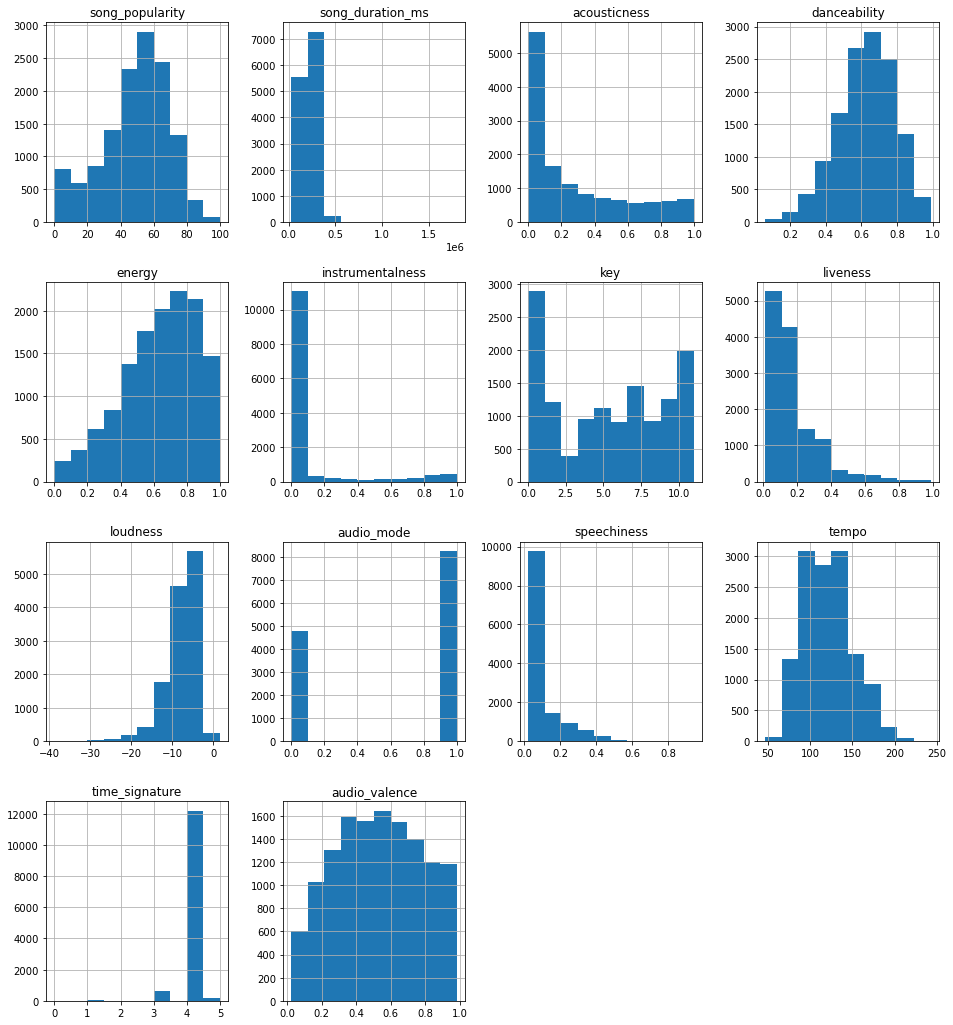

In [13]:
#I forgot to look at the histograms, so I am going to do that to hopefully get some more insight
df.hist(figsize=(16,18))

array([[<AxesSubplot:title={'center':'song_duration_ms'}>]], dtype=object)

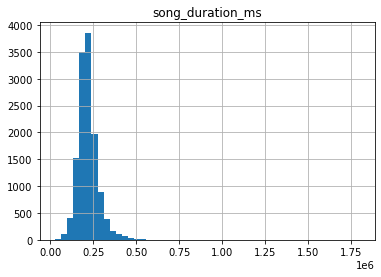

In [14]:
#While some of these might look a little odd, I think most of them seem logical when thinking about what they actually mean
#Song duration might be better effected by having more bins, lets check 50
df.hist(column='song_duration_ms', bins=50)
#By the looks of it, most songs are in the range of 2.5-4 minutes, which is logical

array([[<AxesSubplot:title={'center':'instrumentalness'}>]], dtype=object)

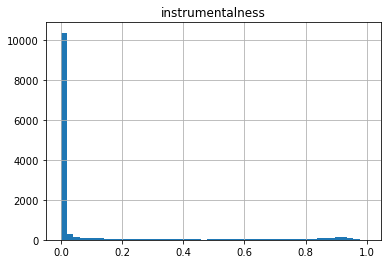

In [15]:
#The other thing that I want to check out is the instumentalness category, as that relates to the amount of singing in any 
#given song, and it seems off that so few of them have high or even middle of the road stats in that category
df.hist(column='instrumentalness', bins=50)
#So it looks like many are either at or near 0, so lets take a look at what some of these songs are.

In [16]:
df[df['instrumentalness'] == 0]
#This holds, as most of these songs have quite a lot of vocals throughout the song, so I don't think there are any problems

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,Is_top_track
1,In The End,66,216933,0.010300,0.542,0.853,0.0,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,False
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.0,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,False
8,Mr. Brightside,80,222586,0.001080,0.330,0.936,0.0,1,0.0926,-3.660,1,0.0917,148.112,4,0.234,False
10,The Middle,78,168253,0.042400,0.629,0.897,0.0,2,0.2630,-3.401,1,0.0483,161.944,4,0.930,False
11,Numb,63,185586,0.004600,0.496,0.863,0.0,9,0.6390,-4.153,1,0.0381,110.018,4,0.243,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13047,All the Beds I've Made (Acoustic),62,213866,0.644000,0.306,0.213,0.0,2,0.1030,-7.790,1,0.0316,89.545,4,0.291,False
13049,Early Morning Coffee Cups,61,199853,0.627000,0.658,0.396,0.0,10,0.1760,-12.753,1,0.0319,97.957,4,0.485,False
13053,Songbird,40,206522,0.570000,0.651,0.261,0.0,1,0.3010,-10.019,1,0.0266,104.116,4,0.287,False
13061,Fall Apart Today,62,203760,0.851000,0.416,0.295,0.0,10,0.1560,-11.523,1,0.0302,108.211,3,0.522,False


In [17]:
#With that insight in place, I think I am going to shift my focus more to looking at things from the perspective of the song
#popularity instead and move towards classification instead of regression
df_by_pop = df.groupby('song_popularity')
df_by_pop['key'].count()

song_popularity
0      216
1       88
2       82
3       55
4       66
      ... 
96       4
97       3
98       3
99       1
100      1
Name: key, Length: 101, dtype: int64

In [18]:
#It looks like there are fewer songs that rank as very popular than there are songs that rank as very unpopular. This is 
#within expectation and helps explain some of the earlier findings as well. Now lets look at the mean of the categories by 
#popularity
df_by_pop.mean()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,Is_top_track
song_popularity,,,,,,,,,,,,,,
0,232849.388889,0.213066,0.633894,0.674296,0.142899,5.699074,0.184002,-7.239380,0.615741,0.125309,125.307875,3.981481,0.538508,0.018519
1,221949.159091,0.196289,0.616352,0.709352,0.084097,5.250000,0.195986,-6.727273,0.545455,0.117843,121.763739,3.988636,0.553542,0.011364
2,224297.426829,0.186084,0.633939,0.713366,0.041776,5.012195,0.172577,-6.393646,0.597561,0.095043,123.697537,3.975610,0.562605,0.000000
3,232524.563636,0.148009,0.613844,0.720491,0.074149,5.290909,0.201745,-6.840927,0.581818,0.092873,119.754709,3.981818,0.537816,0.036364
4,226590.606061,0.226493,0.591348,0.680218,0.085552,5.015152,0.164056,-7.136576,0.712121,0.075794,127.272000,3.924242,0.489864,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,196765.250000,0.276425,0.775000,0.593000,0.000930,7.500000,0.116825,-6.302500,0.750000,0.224800,120.188250,4.000000,0.466750,0.000000
97,231260.000000,0.066210,0.732333,0.691333,0.000984,6.000000,0.129333,-5.163667,0.666667,0.133200,133.642000,4.000000,0.294000,0.333333
98,199869.333333,0.239967,0.727333,0.748667,0.000003,6.000000,0.167600,-5.948333,0.333333,0.196467,102.803000,4.000000,0.465333,0.000000


In [19]:
type(df_by_pop)

pandas.core.groupby.generic.DataFrameGroupBy

A couple of interesting things to note, while many of these categories means show similar numbers on both top and bottom
ends on the spectrum of popularity, the ones that stick out the most as different would be the instrumentalness and the 
audio_valence categories (at least when accouunting for the top 2 as not counting as they only have one value a piece).

<AxesSubplot:xlabel='song_popularity', ylabel='instrumentalness'>

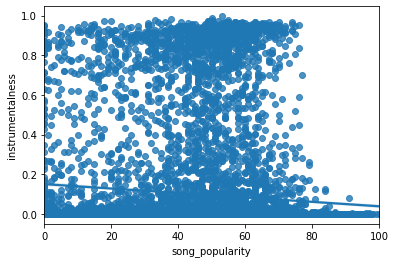

In [20]:
#Lets look at these categories a bit more by looking at some scatterplots.
sns.regplot(x=df['song_popularity'], y=df['instrumentalness'])

It looks like it isn't that great across the board to determine populartiy, but it looks like very popular songs tend
to have more vocals, now lets look at valence.

<AxesSubplot:xlabel='song_popularity', ylabel='audio_valence'>

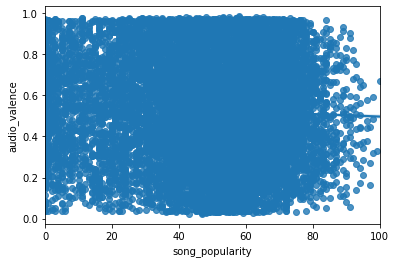

In [21]:
sns.regplot(x=df['song_popularity'], y=df['audio_valence'])

Well, it looks like there is no obvious correlation

In [98]:
#Now I am going to make a scaled dataframe so I can look at what is causing the varience
df_to_scale = df.set_index('song_name')
df_to_scale['Is_top_track'] = df_to_scale['Is_top_track'].astype(int)
df_scaled = scale(df_to_scale)
songs_PCA = PCA().fit(df_scaled)

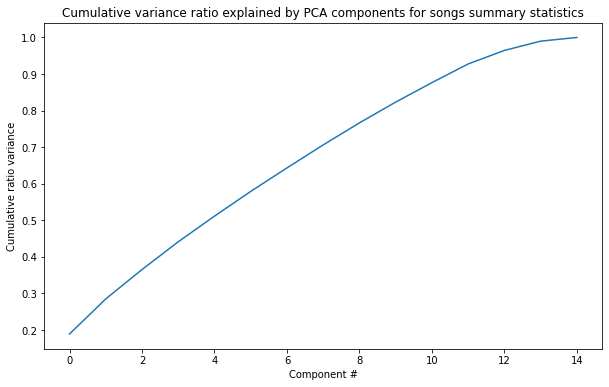

In [99]:
#Now lets plot it
plt.subplots(figsize=(10, 6))
plt.plot(songs_PCA.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for songs summary statistics');

While it looks like most of the values contribute somewhat to the varience, it looks like the last few don't actually have
much of an effect. This may end up being important for later on when considering if I am going to keep all the categories,
specifically the Is_top-track that I created as if it is not effective at explaining the data then it may be worth trimming


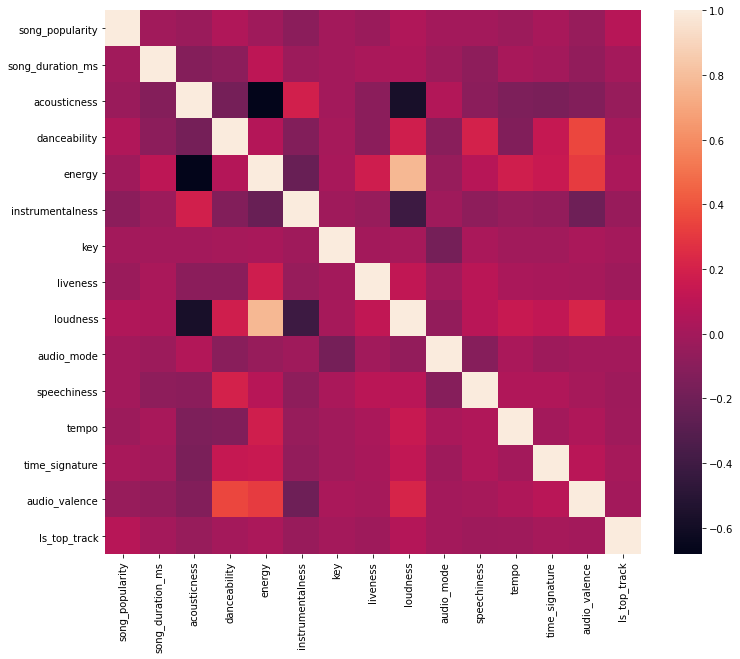

In [24]:
#Also, now that there is a dataframe that just has numerical data in it, a heatmap could be a good thing to look at.
plt.subplots(figsize=(12,10))
sns.heatmap(df_to_scale.corr());

In [25]:
#Looking at the heatmap shows that most categories have little correlation with the popularity of the song. The only ones 
#that stand out to me personally is the loudness and dancability, though energy also seems to play a role. The top track 
#category is seeming ever more useless, so I am leaning in the direction of cutting it altogether. Additionally, I think 
#audio mode and time signature could be cut as they don't describe much and the majority of the results they have are the 
#same. I also think changing popularity to being a floating point number between 0 and 1 would be better for regression
#analysis, so I think I'll do that as well and then use some regression analysis (probably OLS for right now) to try and 
#predict values for song popularity and maybe dancability and loudness.

dfc = df.drop(['Is_top_track', 'audio_mode', 'time_signature', 'song_name'], axis=1)
dfc['song_popularity'] /= 100
dfc.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,audio_valence
0,0.73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,0.0294,167.060,0.474
1,0.66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0.0498,105.256,0.370
2,0.76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,0.0792,123.881,0.324
3,0.74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,0.1070,122.444,0.198
4,0.56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,0.0313,172.011,0.574


In [26]:
#So, I first want to know the effect that each column has on the song popularity. I will accomplish this by using a for loop
#to iterate over a list of the columns and create a linear regression to understand how well each individual row can predict
#the value of the song popularity
def list_of_columns(ex_df, drop_col):
    list_o_col = []
    for item in ex_df.columns:
        list_o_col.append(item)
    #get rid of drop_col as that is the dependent value
    list_o_col.remove(drop_col)
    comp_col = drop_col
    return list_o_col, comp_col

In [27]:
minus_pop, pop_g = list_of_columns(dfc, 'song_popularity')

In [28]:
#I want this function to iterate over all the columns except the one we are trying to predict and give the R2 scores and the
#model for each column in case further exploration of a model is required
def show_explain(ex_df, x_cols, y_col):
    #Create empty list to put r2 scores into for later comparison and of models. I will move into a dictionary later, but 
    #I felt like using lists for this part
    list_of_r2 = []
    list_of_model = []
    for item in x_cols:
        x = ex_df[[item]]
        x = sm.add_constant(x)
        y = ex_df[[y_col]]
        #I'm going with a test size of 30% for now
        x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.30, random_state = 42)
        mod = sm.OLS(y_tr, x_tr)
        mod_res = mod.fit()
        list_of_r2.append(mod_res.rsquared)
        list_of_model.append(mod_res)
    #Now to put all the values into a dictionary with their corresponding column
    return_dict = {'Column' : [], 'R2_Score' : [], 'Model_Result_Info' : []}
    for i in range(len(x_cols)):
        return_dict['Column'].append(x_cols[i])
        return_dict['R2_Score'].append(list_of_r2[i])
        return_dict['Model_Result_Info'].append(list_of_model[i])
    return return_dict

In [29]:
popularity_dict = show_explain(dfc, minus_pop, pop_g)

In [30]:
for i in range(len(popularity_dict['Column'])):
    print(popularity_dict['Column'][i] + ':', popularity_dict['R2_Score'][i])

song_duration_ms: 4.3698919334866915e-05
acousticness: 0.0017805389825332751
danceability: 0.002071811263750334
energy: 3.311793202287472e-05
instrumentalness: 0.008849248492712292
key: 1.6746031126002592e-05
liveness: 0.0006453187534807281
loudness: 0.003741756361098969
speechiness: 1.1410056692584547e-05
tempo: 0.0008258894596248068
audio_valence: 0.0036095665733176796


Well these answers are useful in the fact that they show that each category is pretty bad at predicting the populartiy of the song. The higest r^2 score there was was 0.008 or 0.8% for instumentalness, and even that could be different if we did a bootstrap test on the dataset. Needless to say I am a bit dissapointed when it comes to these results. I think I am moving towards the conclusion that trying to instead predict a different category. My personal guess as to why it is hard to predict the popularity of a song is because of the listening habits of people, espically on Spotify. If people are into one style of music (I like LoFi Beats for example), then they could raise the popularity of a category or piece of music even if it is not inheritly a "popular" song. I think instead, what I should be looking for is maximizing one specific aspect of a song in order to appeal to the target group of a given category so as to reach more listeners who are looking (consciously or not) for a given aspect of music.

In [57]:
#I'm starting to think that there is virtually no difference in higher or lower popularity songs and the popularity is up 
#to chance, which would lead me to looking for a different stat to base my study on. I will try to find out if this is the 
#case by doing a null hypothesis test. The null hypothesis that I will go with is that song popularity differences are 
#just due to chance, with the alt hypothesis that the difference in popularity is not just up to chance, and that the 
#differences are the cause of the observed summary statistics.

#I first want to create a new category based on popularity so I can find the difference of the mean of all correlations 
#using the df.corr function. I'll set the popular category to anything above 50% and consequently put the low popularity to
#anything below 50%, setting the values to 1 and 0 respectivly
h_list = []
for i in range(len(dfc['song_popularity'])):
    if dfc['song_popularity'][i] > 0.50:
        h_list.append(1)
    else:
        h_list.append(0)

In [58]:
dfc['pop_group'] = h_list
dfc.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,audio_valence,pop_group
0,0.73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,0.0294,167.060,0.474,1
1,0.66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0.0498,105.256,0.370,1
2,0.76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,0.0792,123.881,0.324,1
3,0.74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,0.1070,122.444,0.198,1
4,0.56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,0.0313,172.011,0.574,1


In [79]:
#Now I will find my average correlation by taking the absolute values 
group_0 = dfc.groupby('pop_group').corr().iloc[0].iloc[1:]
group_1 = dfc.groupby('pop_group').corr().iloc[12].iloc[1:]

In [83]:
g0_mean = np.mean(np.abs(group_0))
g1_mean = np.mean(np.abs(group_1))
mean_diff = g1_mean - g0_mean
print(g0_mean)
print(g1_mean)
print(mean_diff)

0.032715761386119147
0.06736065993963104
0.034644898553511896


In [84]:
#Now that I have my observed value for the average correlation of all groups set up by popularity group and subtracted, I 
#have an observed value that I can use when calculating the p-score. Now I'm going to set up a bootstrap permutation for 
#the pop_group category and run 10000 permutations.
diffs = []
throw_df = dfc
for i in range(10000):
    throw_df['perm'] = np.random.permutation(throw_df['pop_group'])
    non_pop_mean = np.mean(np.abs(throw_df.groupby('perm').corr().iloc[0].iloc[1:]))
    pop_mean = np.mean(np.abs(throw_df.groupby('perm').corr().iloc[12].iloc[1:]))
    diff_to_list = pop_mean - non_pop_mean
    diffs.append(diff_to_list)
#And I just want to see the mean of the diffs for now
print(np.mean(diffs))

0.01626890467486889


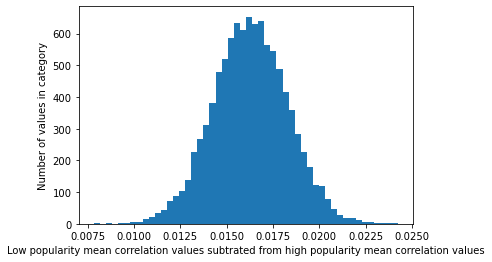

In [86]:
#I also want to look at this in a histogram for better visualization before I calculate the p-score
_ = plt.hist(diffs, bins=50)
_ = plt.xlabel('Low popularity mean correlation values subtrated from high popularity mean correlation values')
_ = plt.ylabel('Number of values in category')

In [88]:
#As expected it makes a graph that is somewhat similar to a normal distribution. Now it's time to estimate the p-value
org_list = []
for item in diffs:
    if item >= mean_diff:
        org_list.append(item)
p = len(org_list) / len(diffs)
print(p)

0.0


Well, much to my suprise the p value is so low that I could not achieve the results that I initally got with even 10000 samples. I am taking this to mean that correlation of the various categories in reguards to the popularity is not just random, thus rejecting the null hypothesis. That being said, it does not necessarily mean that the correlation is super high or useful for prediction, just that the correlation is enough to be more than just assigning randomly. So, when I go to modeling I will definitly have to look at popularity again. 

With all that in mind I feel like another switch is required of me, and moving forward I will be looking more into the dancability of the music. I made this choice because I think the dancability, both historicly and contemporarily, have had an effect on how well songs tend to do (Soulja Boy made a carrer out of one song that was good to dance to). I think then using this as a metric to maximize would then be beneficial when trying to gain popularity within this group. Well, I suppose there's no time like the present.

In [33]:
#First off, because I'm reorganizing myself, I think I'll start by just reviewing the dancability information.
#I want to store these to varibles for later use
dac_mean = np.mean(dfc['danceability'])
dac_std = np.std(dfc['danceability'])

#I also just want to see everything about the category by itself
dfc['danceability'].describe()

count    13068.000000
mean         0.625106
std          0.158949
min          0.059400
25%          0.525000
50%          0.637000
75%          0.741000
max          0.987000
Name: danceability, dtype: float64

<AxesSubplot:>

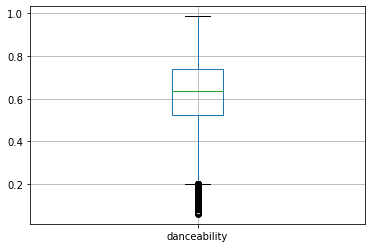

In [34]:
#I also want to look at a boxplot for better visualization
dfc.boxplot('danceability')

<AxesSubplot:>

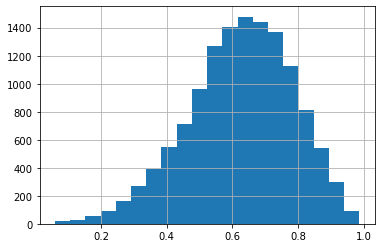

In [38]:
#And as a refresher the histogram
dfc['danceability'].hist(bins=20)

In [40]:
#Well, from what we can see it looks like it is set up on a scale from 0-1, though no values fall at either extreme. 
#Remember from the heatmap, we already know of a few categories that correspond well with dacability were audio_valence, 
#speechiness and loudness (time signature did as well but I have a guess that it was just because it fell into the category
#that most songs are in 4/4 time, even more so when it comes to dancing unless it's a waltz).
#I guess what I'll look at next is how well each category describes dancability using OLS linear regression
minus_dan, dan = list_of_columns(dfc, 'danceability')
dancing_dict = show_explain(dfc, minus_dan, dan)
for i in range(len(dancing_dict['Column'])):
    print(dancing_dict['Column'][i] + ':', dancing_dict['R2_Score'][i])

song_popularity: 0.0020718112637498898
song_duration_ms: 0.007441817841075782
acousticness: 0.029249046188896455
energy: 0.0033506186084960587
instrumentalness: 0.013301591596688533
key: 0.0002048023976064517
liveness: 0.009154241116083206
loudness: 0.028442106070984963
speechiness: 0.04157132380514594
tempo: 0.0186299165365994
audio_valence: 0.12351632009023317


In [95]:
#Okay, still not the best R2 scores, but I've still yet to do any modeling in a proper sence of the word, as most of that
#is for later. It is good to see that at least some of these are performing better, and I feel like modeling based on all
#(or at least multiple) categories is the direction I am going to head for now.
x = dfc.drop(['danceability'], axis=1)
x = sm.add_constant(x)
y = dfc[['danceability']]
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.3, random_state = 42)
d_mod_1 = sm.OLS(y_tr, x_tr).fit()

Text(0, 0.5, 'Predicted danceability values')

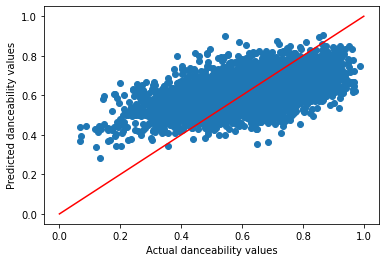

In [102]:
y_pred = d_mod_1.predict(x_te)
plt.scatter(y_te, y_pred)
plt.plot([x for x in range(0,2)],[x for x in range(0,2)], color='r')
plt.xlabel('Actual danceability values')
plt.ylabel('Predicted danceability values')

In [96]:
d_mod_1.rsquared

0.2863896866988501

Okay, that's not terrible, espically when we are only running a simple model like Ordinary Least Squares. I have to wonder though if some of the other categories were cut if it would be all that important. I think I'll try to drop a few more cols for the OLS testing to help lower the amount of predictors and thus increase the speed of completion and lower the redundancy. After that I will feel pretty comfortable moving on, as I think I have completed some good analysis on this dataset and would feel comfortable moving onto some more advance modeling beside just looking at the OLS r^2 scores

In [103]:
#Dropping song popularity, song duration, and key as all seem to have little effect when earlier observed
x = dfc.drop(['danceability', 'song_duration_ms', 'song_popularity', 'key'], axis=1)
x = sm.add_constant(x)
y = dfc[['danceability']]
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.3, random_state = 42)
d_mod_2 = sm.OLS(y_tr, x_tr).fit()
d_mod_2.rsquared

0.2843819279030244

In [105]:
#Okay, so I think it's fair to drop at least those ones as there was only a difference of ~0.2% between the results, lets
#try some more with liveness
x = dfc.drop(['danceability', 'song_duration_ms', 'song_popularity', 'key', 'liveness'], axis=1)
x = sm.add_constant(x)
y = dfc[['danceability']]
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.3, random_state = 42)
d_mod_3 = sm.OLS(y_tr, x_tr).fit()
d_mod_3.rsquared

0.2763354292222263

In [106]:
#Well it's starting to drop a bit more now, the last thing that I will check is what heppens when energy is removed
x = dfc.drop(['danceability', 'song_duration_ms', 'song_popularity', 'key', 'liveness', 'energy'], axis=1)
x = sm.add_constant(x)
y = dfc[['danceability']]
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.3, random_state = 42)
d_mod_4 = sm.OLS(y_tr, x_tr).fit()
d_mod_4.rsquared

0.20910778633032368

Wow, so quite the drop when all of those are removed from the modeling. With this, I feel like I know enoguh about this dataset that I can move forward with the actual modeling process. This is not to say that I know all there is to know about the dataset, and I will probably have to do more data analysis later. That being said I feel comfortable enough to move on so I will.